# Concentration to RDF neural network

Short instruction or explanation or description

In [86]:
from conc2RDF import NeuralNetwork, DataSetFromList, FromXVGFile, Directory, Analyzer
import torch
import matplotlib.pyplot as plt

## Loading Data

In [87]:
directory_path = "/largedisk/julius_w/Development/conc2RDF/training_data"
newdir = Directory(directory_path)
newset = DataSetFromList(newdir.get_relevant_files())


## Creating the model

In [88]:
#model = NeuralNetwork(train_data.get_output_size(), 0.001, num_neurons=[50, 50, 50])

## Training the model

In [89]:
#model.train_network(train_data, test_data, 5000)

## Alternative: Load model from file

In [97]:
model = torch.load("./model.pth", weights_only=False)

In [98]:
model

NeuralNetwork(
  (network): Sequential(
    (0): Linear(in_features=1, out_features=5, bias=True)
    (1): ReLU()
    (2): Linear(in_features=5, out_features=190, bias=True)
  )
  (criterion): MSELoss()
)

## Analyzing the results

In [99]:
my_analyzer = Analyzer(model)

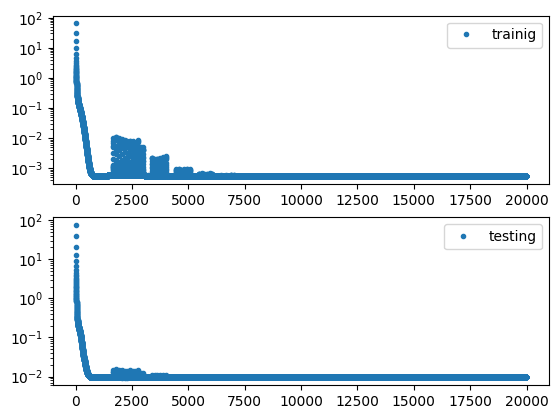

In [100]:
my_analyzer.get_dashboard()

In [101]:
my_analyzer.show_predictions(newset)

In [102]:
my_analyzer.show_errors(newset)

## Saving Model

In [10]:
model.save_model()

In [51]:
newset.outputs[1]

tensor([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 2.7000e-05, 2.4700e-04, 1.6800e-03,
        8.4200e-03, 2.8366e-02, 7.6169e-02, 1.6055e-01, 2.8694e-01, 4.6072e-01,
        6.8254e-01, 9.4814e-01, 1.2576e+00, 1.5827e+00, 1.9292e+00, 2.2445e+00,
        2.5298e+00, 2.7597e+00, 2.9434e+00, 3.0806e+00, 3.1702e+00, 3.2205e+00,
        3.2288e+00, 3.2151e+00, 3.1826e+00, 3.1268e+00, 3.0656e+00, 2.9920e+00,
        2.9093e+00, 2.8214e+00, 2.7312e+00, 2.6425e+00, 2.5516e+00, 2.4584e+00,
        2.3608e+00, 2.2586e+00, 2.1593e+00, 2.0654e+00, 1.9666e+00, 1.8819e+00,
        1.7980e+00, 1.7296e+00, 1.6673e+

In [77]:
import numpy as np

MSE: 0.5197139382362366
real 0 from funct 1


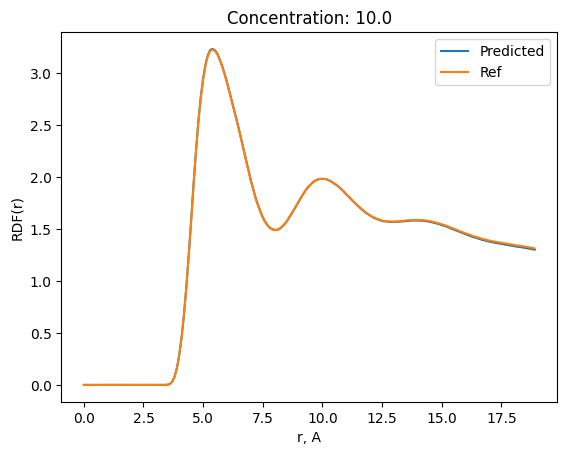

MSE: 0.1880970001220703
real 1 from funct 9


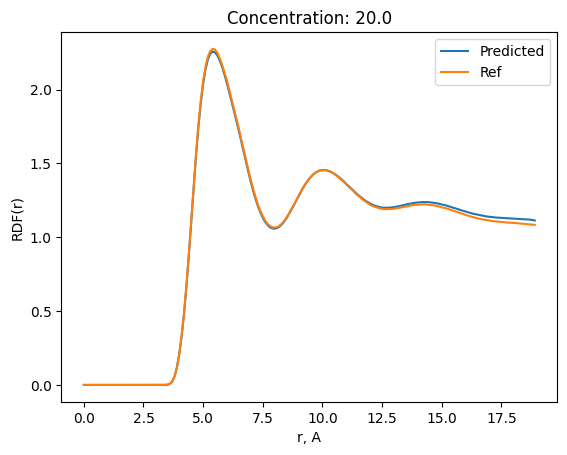

MSE: 0.0033337955828756094
real 2 from funct 5


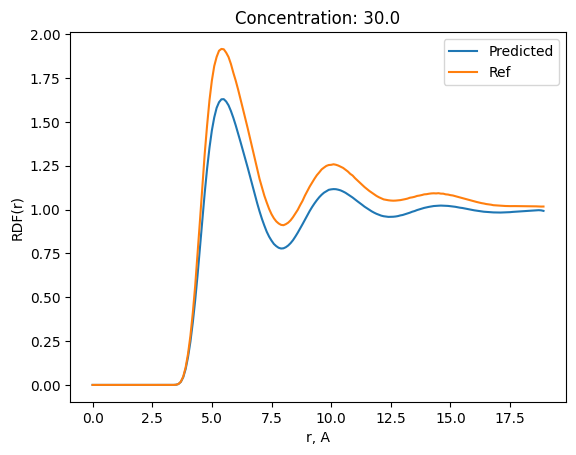

MSE: 0.0002811935846693814
real 3 from funct 2


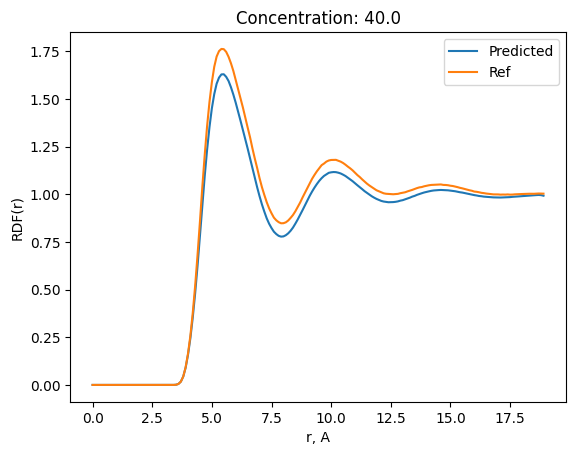

MSE: 2.4900589778553694e-05
real 4 from funct 8


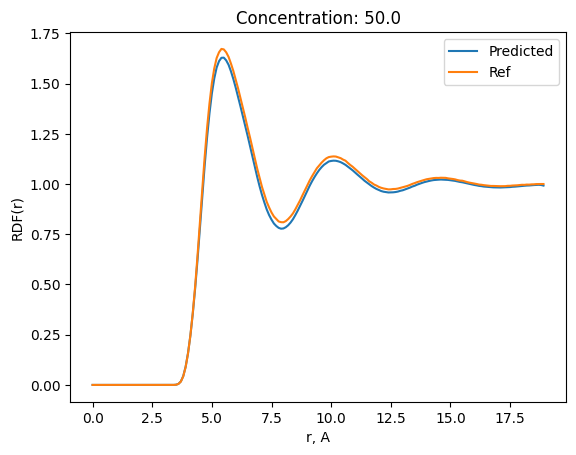

MSE: 0.01464314665645361
real 5 from funct 4


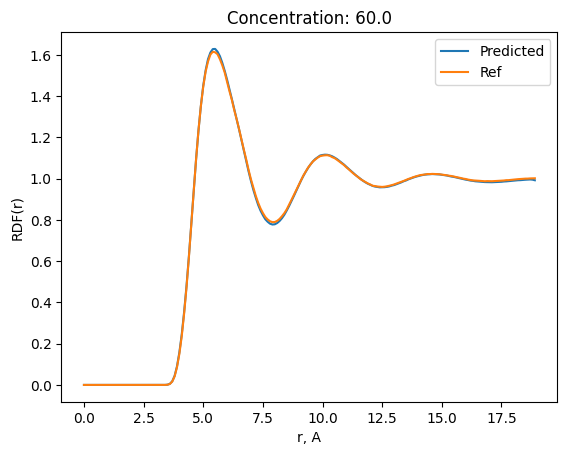

MSE: 0.0002057161764241755
real 6 from funct 6


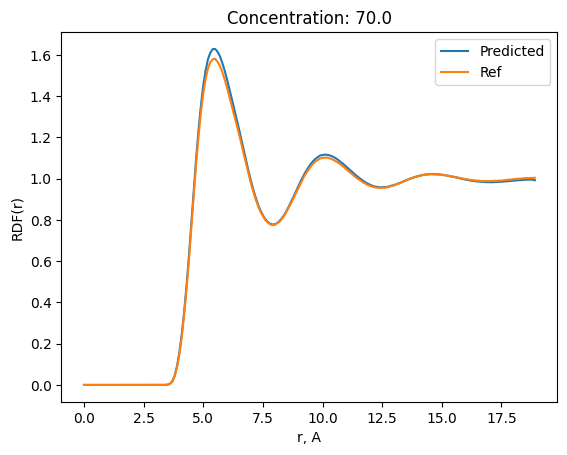

MSE: 0.00020066596334800124
real 7 from funct 3


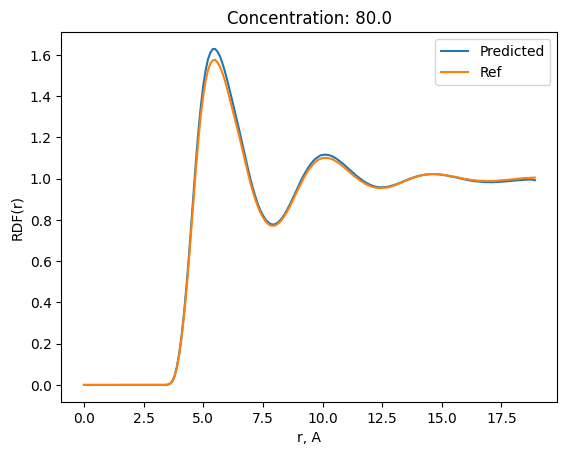

MSE: 0.0004563468974083662
real 8 from funct 7


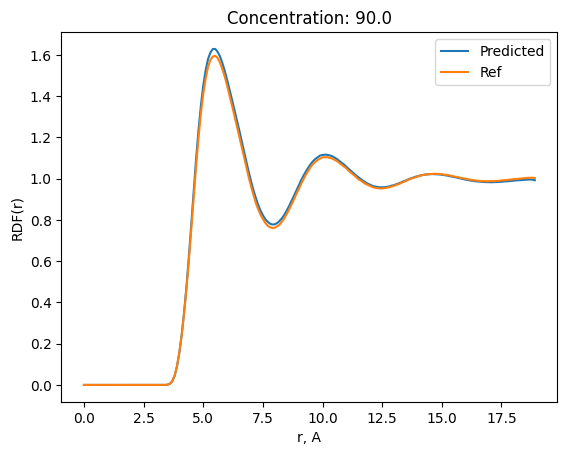

MSE: 0.07749222964048386
real 9 from funct 0


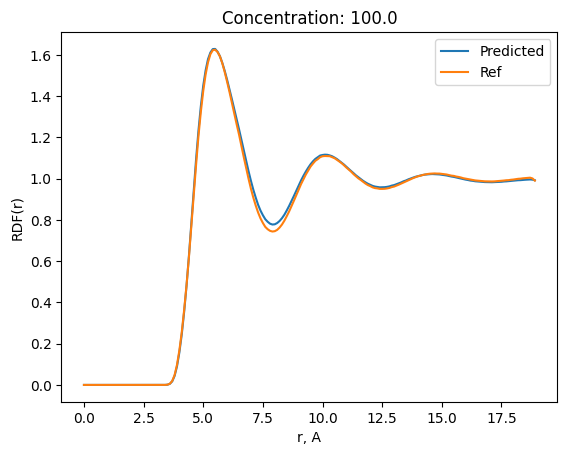

In [105]:
for i in range(10):
    conc = 10.0 * (i + 1)
    ref_rdf_idx = newset.get_indices([conc])[0]
    rdf_pred = model(torch.Tensor([conc]))
    plt.plot(newset.rvalues*10, rdf_pred.detach().numpy(), label="Predicted")
    plt.plot(newset.rvalues*10, newset.outputs[ref_rdf_idx], label="Ref")
    plt.xlabel("r, A")
    plt.ylabel("RDF(r)")
    plt.legend()
    plt.title(f"Concentration: {conc}")
    mse_value = np.mean((rdf_pred.detach().numpy() - newset.outputs[i].detach().numpy()) ** 2)
    print(f"MSE: {mse_value}")
    print(f"real {i} from funct {ref_rdf_idx}")
    plt.show()

In [74]:
len(newset.inputs)

10

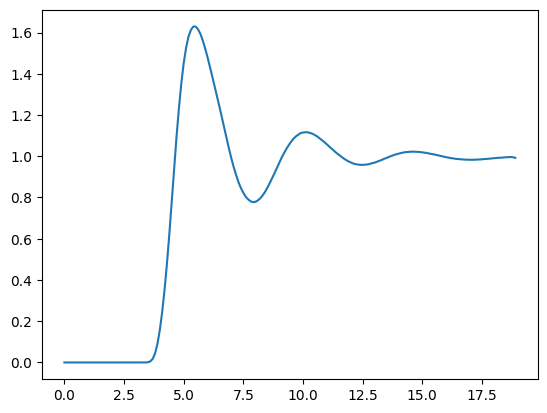

In [106]:
conc = 42.0

rdf_pred = model(torch.Tensor([conc]))
plt.plot(newset.rvalues*10, rdf_pred.detach().numpy(), label="Predicted")